## Uber vs Lyft Cost Analysis
\
Objective: To compare the fare between Lyft and Uber

This notebook contains process of data exploration and visualization that helps to make inference on deciding which of the 2 ridesharing company is better for consumer point of view.

Time frame: 26th Nov 2018 to 19th Dec 2018 (24 days)  
Location: Boston, MA

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

ride_df = pd.read_csv(r'C:\Users\Punde\Desktop\Data Science\Kaggle\lyft\cab_rides.csv')

In [53]:
ride_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


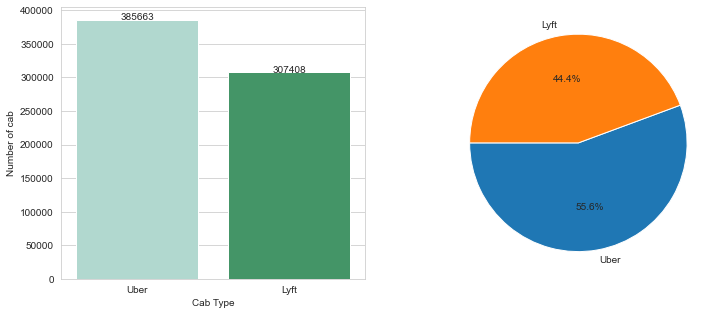

In [54]:
f, axes = plt.subplots (1,2, figsize=(12,5))

#histogram
x = ['Uber','Lyft']
y = [ride_df.cab_type[(ride_df.cab_type)=='Uber'].count(), ride_df.cab_type[(ride_df.cab_type)=='Lyft'].count()]

vis1 = sns.barplot(x, y, palette ='BuGn',ax=axes[0])
vis1.set(xlabel='Cab Type',ylabel='Number of cab')


for p in vis1.patches:
    vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center')


#Pie
Ncab_type = [ride_df.cab_type[(ride_df.cab_type)=='Uber'].count(),ride_df.cab_type[(ride_df.cab_type)=='Lyft'].count()]    
cab_type = ['Uber','Lyft']

plt.pie(Ncab_type, labels=cab_type, startangle=180, autopct='%.1f%%')

plt.show()

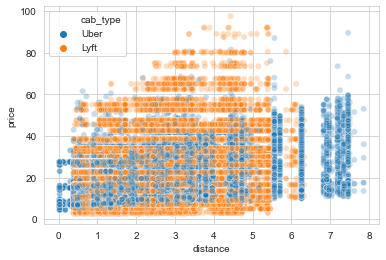

In [55]:
Taxi = ride_df[ride_df.name == 'Taxi'].index
ride_df.drop(Taxi , inplace = True)

vis1 = sns.scatterplot(ride_df.distance, ride_df.price, hue=ride_df.cab_type, hue_order=cab_type, alpha=0.25, legend='full')

Drop 'Taxi' from Uber cabs as they use a different fare structure (in the dataset Taxi fare is always 0 USD) Based on the chart above, it can be observed that Lyft has a lower minimum fare compared to Uber, at the same time Lyft has higher maximum fare. Also, Uber travel distances are generally higher than Lyft.

We also know there is a 'surge multiplier' factor in Lyft, where the fare is multiplied by a certain rate during rush hours. When prices surge , Uber does not show a multiplier and instead quotes only the higher price up front.

In [56]:
LyftOnly = ride_df[ride_df.cab_type == 'Lyft']
A = LyftOnly.groupby(['name','surge_multiplier'],as_index=False).count()
A

,name,surge_multiplier,distance,cab_type,time_stamp,destination,source,price,id,product_id
0,Lux,1.00,47040,47040,47040,47040,47040,47040,47040,47040
1,Lux,1.25,2217,2217,2217,2217,2217,2217,2217,2217
2,Lux,1.50,1013,1013,1013,1013,1013,1013,1013,1013
3,Lux,1.75,484,484,484,484,484,484,484,484
4,Lux,2.00,481,481,481,481,481,481,481,481
5,Lux Black,1.00,47040,47040,47040,47040,47040,47040,47040,47040
6,Lux Black,1.25,2217,2217,2217,2217,2217,2217,2217,2217
7,Lux Black,1.50,1013,1013,1013,1013,1013,1013,1013,1013
8,Lux Black,1.75,484,484,484,484,484,484,484,484
9,Lux Black,2.00,481,481,481,481,481,481,481,481


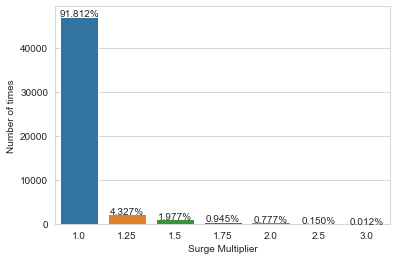

In [41]:
A[:][22:29]
B=A[22:29]['id']
C = A['surge_multiplier']

total = sum(B/100)
vis1= sns.barplot(C, B)
vis1.set(xlabel = 'Surge Multiplier', ylabel = 'Number of times')

for p in vis1.patches:
    height = p.get_height()
    vis1.text(p.get_x()+p.get_width()/2., height+15,'{:.3f}%'.format(height/total), ha="center") 

plt.show()

In [57]:
ride_df2 = ride_df.copy()

for i in (list(ride_df2.index.values)):
    if ride_df2.cab_type[i]=='Uber': 
        pass
    elif (ride_df2.cab_type[i] == 'Lyft') & (ride_df2.surge_multiplier[i] != 1.0):
        ride_df2.price[i] = (ride_df.price[i] * ride_df2.surge_multiplier[i])

C:\Users\Punde\Anaconda3\envs\friday\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


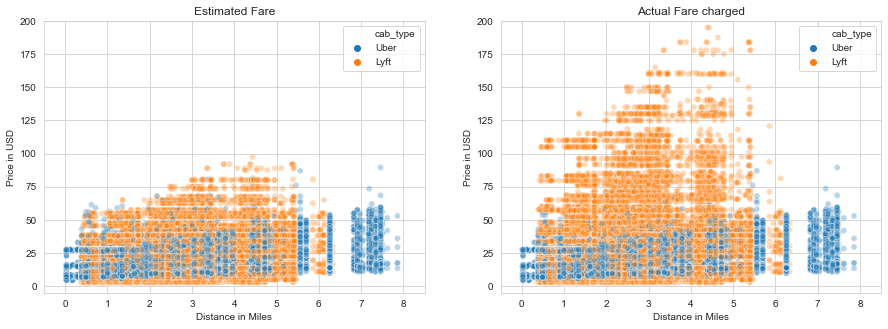

In [58]:
g, axes = plt.subplots (1,2, figsize=(15,5))

vis1 = sns.scatterplot(ride_df.distance,ride_df.price, hue=ride_df.cab_type, hue_order=cab_type,alpha=0.3, ax=axes[0])

vis2 = sns.scatterplot(ride_df2.distance,ride_df2.price, hue=ride_df2.cab_type, hue_order=cab_type,alpha=0.3,ax=axes[1])

vis1.set(xlim=(-0.5, 8.5))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.5, 8.5))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')


axes[0].set_title('Estimated Fare')
axes[1].set_title('Actual Fare charged')

plt.ioff()

After multiplying with the surge multiplier, Lyft fare shows higher range of fare. Does this means Uber has a better fare rate? First, let's break down into the types of rides both companies have. As we know there are normal rides, carpool rides, SUV rides, luxury rides etc... each has a different rate.

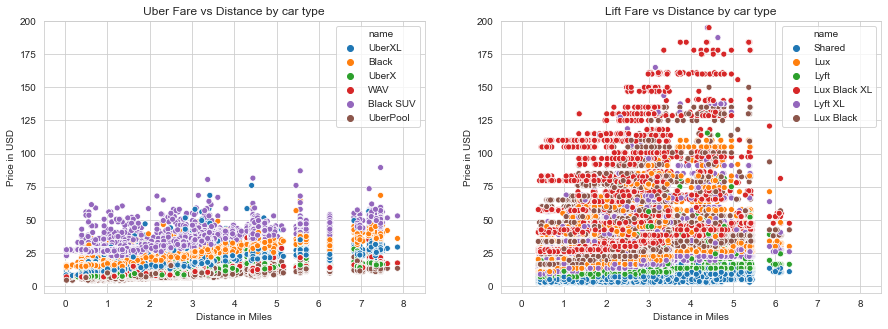

In [59]:
LyftOnly2 = ride_df2[ride_df2.cab_type == 'Lyft']
UberOnly = ride_df2[ride_df2.cab_type == 'Uber']

g, axes = plt.subplots (1,2, figsize=(15,5))

vis1 = sns.scatterplot(LyftOnly2.distance, LyftOnly2.price, hue=LyftOnly.name, ax=axes[1])
vis2 = sns.scatterplot(UberOnly.distance, UberOnly.price, hue=UberOnly.name, ax=axes[0])

vis1.set(xlim=(-0.5, 8.5))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.5, 8.5))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')

axes[1].set_title('Lift Fare vs Distance by car type')
axes[0].set_title('Uber Fare vs Distance by car type')

plt.show()

Unfortunately the chart looks a little messy and it is difficult to compare, so let's further break down the types of rides.  

**Lyft vs Uber**
* Lyft ordinary ride fare is comparable to UberX
* Lux Black XL is comparable to Black SUV
* Lyft XL is comparable to UberXL
* Shared is comparable to UberPool

At the same time, we will join the intersection of Lyft and Uber rides that shares the same time frame (timestamp) and source & destination. This way it is a fair comparison as we are comparing the exact time/weather/traffic condition from both company.


In [60]:
Join_TDS = UberOnly.merge(LyftOnly2, how='inner',on=['time_stamp','destination','source'])
Join_TDS = Join_TDS.drop(columns=["id_x","product_id_x","id_y","product_id_y","surge_multiplier_x","surge_multiplier_y"])

In [61]:
Join_TDS

,distance_x,cab_type_x,time_stamp,destination,source,price_x,name_x,distance_y,cab_type_y,price_y,name_y
0,2.84,Uber,1543559281472,Fenway,West End,11.0,UberX,2.98,Lyft,9.0,Lyft
1,2.84,Uber,1543559281472,Fenway,West End,11.0,UberX,2.98,Lyft,34.0,Lux Black XL
2,1.21,Uber,1543694579089,North End,Financial District,8.5,UberX,1.00,Lyft,16.5,Lux Black
3,1.21,Uber,1543694579089,North End,Financial District,8.5,UberX,1.00,Lyft,27.5,Lux Black XL
4,1.21,Uber,1543694579089,North End,Financial District,8.5,UberX,1.00,Lyft,3.0,Shared
...,...,...,...,...,...,...,...,...,...,...,...
6182,1.80,Uber,1545158403538,Northeastern University,Theatre District,9.0,UberX,2.88,Lyft,38.5,Lux Black XL
6183,1.80,Uber,1545158403538,Northeastern University,Theatre District,9.0,UberX,2.88,Lyft,10.5,Lyft
6184,1.80,Uber,1545158403538,Northeastern University,Theatre District,29.0,Black SUV,2.88,Lyft,22.5,Lux
6185,1.80,Uber,1545158403538,Northeastern University,Theatre District,29.0,Black SUV,2.88,Lyft,38.5,Lux Black XL


Dropping rides that are hard to compare:   
* WAV= wheelchar accessible (Uber) that is not specified in Lyft 
* Uber Black which I am not sure to compare with Lyft Lux or Lyft Lux Black

In [62]:
A = Join_TDS[Join_TDS.name_x == 'WAV'].index
Join_TDS.drop(A , inplace=True)
A = Join_TDS[Join_TDS.name_x == 'Black'].index
Join_TDS.drop(A , inplace=True)
A = Join_TDS[Join_TDS.name_y == 'Lux'].index                
Join_TDS.drop(A , inplace=True)
A = Join_TDS[Join_TDS.name_y == 'Lux Black'].index                
Join_TDS.drop(A , inplace=True)


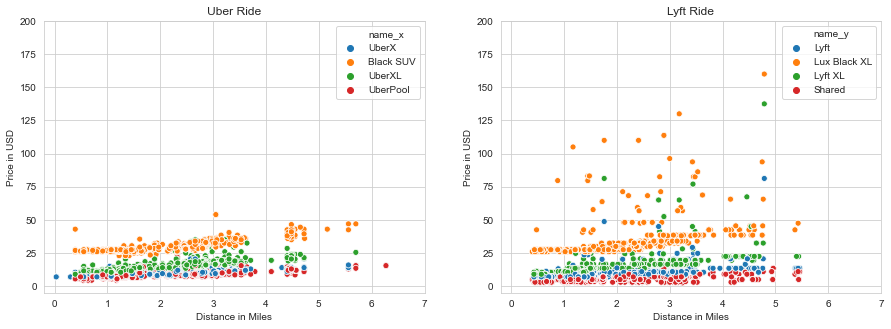

In [64]:
g, axes = plt.subplots (1,2, figsize=(15,5))

U1=['UberX','Black SUV','UberXL','UberPool']
L1=['Lyft','Lux Black XL','Lyft XL','Shared']

vis1=sns.scatterplot(Join_TDS.distance_x, Join_TDS.price_x, hue=Join_TDS.name_x,hue_order=U1,ax=axes[0])
vis2=sns.scatterplot(Join_TDS.distance_y, Join_TDS.price_y, hue=Join_TDS.name_y,hue_order=L1,ax=axes[1])

vis1.set(xlim=(-0.2, 7))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.2, 7))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis1.set_title('Uber Ride')
vis2.set_title('Lyft Ride')

plt.show()

It looks like our first observation still stands, Lyft has a bigger range of fare rate, at the same time lower minumum charge.

In [69]:
cols = ['time_stamp', 'destination', 'source', 'distance', 'cab_type', 'price', 'name']

A = Join_TDS[['time_stamp', 'destination', 'source', 'distance_x', 'cab_type_x', 'price_x', 'name_x']]
A.columns = cols

B = Join_TDS[['time_stamp', 'destination', 'source', 'distance_y', 'cab_type_y', 'price_y', 'name_y']]
B.columns = cols

combined = A.append(B)

In [70]:
combined['fare_per_mile']= round(combined.price/combined.distance,2)

In [71]:
combined

,time_stamp,destination,source,distance,cab_type,price,name,fare_per_mile
0,1543559281472,Fenway,West End,2.84,Uber,11.0,UberX,3.87
1,1543559281472,Fenway,West End,2.84,Uber,11.0,UberX,3.87
3,1543694579089,North End,Financial District,1.21,Uber,8.5,UberX,7.02
4,1543694579089,North End,Financial District,1.21,Uber,8.5,UberX,7.02
5,1543694579089,North End,Financial District,1.21,Uber,8.5,UberX,7.02
...,...,...,...,...,...,...,...,...
6180,1543502580907,North Station,Haymarket Square,0.55,Lyft,27.5,Lux Black XL,50.00
6182,1545158403538,Northeastern University,Theatre District,2.88,Lyft,38.5,Lux Black XL,13.37
6183,1545158403538,Northeastern University,Theatre District,2.88,Lyft,10.5,Lyft,3.65
6185,1545158403538,Northeastern University,Theatre District,2.88,Lyft,38.5,Lux Black XL,13.37


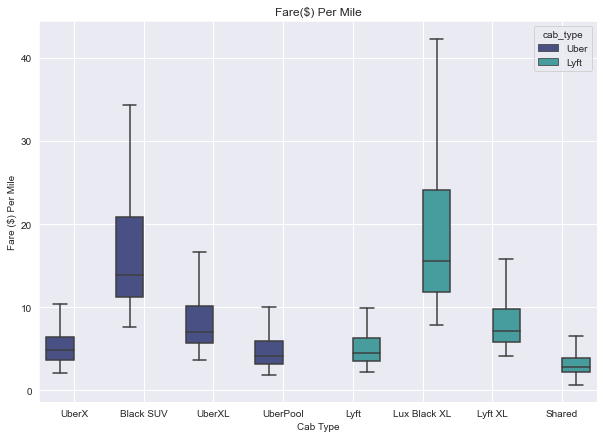

In [80]:
rides = ['UberX', 'Black SUV', 'UberXL', 'UberPool', 'Lyft', 'Lux Black XL','Lyft XL','Shared']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))

vis1 = sns.boxplot(combined.name,combined.fare_per_mile,showfliers=False,hue=combined.cab_type,order=rides,palette='mako')

vis1.set_title('Fare($) Per Mile')
vis1.set(xlabel = 'Cab Type', ylabel = 'Fare ($) Per Mile')

vis1.grid(b=True, which='major', color='w', linewidth=1)
vis1.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.ioff()


Lyft has a better rate for shared category. Lyft XL has a slightly lower fare per mile than UberXL. Uber Black SUV shows lower rate than Lyft Black XL. Lyft ordinary ride and UberX has similar rates, in which Lyft is better up till 3rd quarter of sample.

Next let's look at the time factor that might affect the availability and fare for the rides

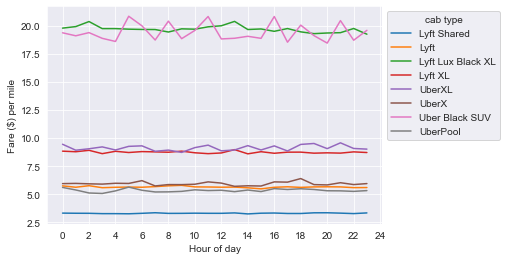

In [83]:
import datetime
#convert 13digit time stamp to datetime format
ride_df2['time']= pd.to_datetime(ride_df2['time_stamp'], unit='ms')
#extract hours only
ride_df2['hour']= ride_df2['time'].dt.hour
ride_df2['fare_per_mile']= round(ride_df2.price/ride_df2.distance,2)

#drop unwanted rows that is not comparable
A=ride_df2[ride_df2.name == 'WAV'].index
ride_df2.drop(A , inplace=True)
A=ride_df2[ride_df2.name == 'Black'].index
ride_df2.drop(A , inplace=True)
A=ride_df2[ride_df2.name == 'Lux'].index                
ride_df2.drop(A , inplace=True)
A=ride_df2[ride_df2.name == 'Lux Black'].index                
ride_df2.drop(A , inplace=True)

vis1 = sns.lineplot(x=ride_df2.hour, y=ride_df2.fare_per_mile, hue=ride_df2.name,err_style=None)

plt.xticks(range(0, 25,2))
vis1.set(xlabel='Hour of day',ylabel='Fare ($) per mile')
plt.legend(title='cab type', loc='upper left', labels=['Lyft Shared', 'Lyft','Lyft Lux Black XL','Lyft XL',\
                                                     'UberXL','UberX','Uber Black SUV','UberPool'],bbox_to_anchor=(1,1))

plt.show()

The hourly chart gives us the following info:

* **First two pair lines:** The average fare for Lyft Lux Black XL has a less deviation with respect to hour of the day compared to Uber Black SUV
* **2nd line pair:** The average fare per mile for UberXL is more expensive than Lyft XL rides
* **3rd line pair:** Lyft ordinary ride beats UberX ordinary ride in terms of average fare
* **Final pair:** Lyft Shared ride which average about 3 USD is cheaper than UberPool that averages above 5USD.

**So far, I infer Lyft rides has a better rate compared to Uber for this particular dataset.**
